In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Technically not necessary in newest versions of jupyter
%matplotlib inline

## Loading data 

In [18]:
import os 
data_path = "C:\\Users\\eslam\\0-MY WORK\\Datasets\\2-German traffic benchmark\\"

os.listdir(data_path)

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

## Exploring data

In [19]:
# The PIL library is used to open image content into an array
from PIL import Image

In [20]:
data = []
labels = []
classes = 43

cur_path = os.getcwd()

for i in range(43):
    path = os.path.join(data_path, "train", str(i))
    images = os.listdir(path)
    
    
    for a in images:
        try:
            image = Image.open(path+"\\" + a)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
        except:
            print("Error lpading image")
            

    

In [21]:
data = np.array(data)
labels = np.array(labels)

In [22]:
print(data.shape)

(39209, 30, 30, 3)


In [23]:
print(labels.shape)

(39209,)


In [24]:
# split the data to train ,test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape , y_test.shape)

(26270, 30, 30, 3) (26270,)
(12939, 30, 30, 3) (12939,)


**Convert the label using one-hot-encoding**

In [26]:
from tensorflow.keras.utils import to_categorical

# converting
y_train = to_categorical(y = y_train, num_classes= 43)
y_test = to_categorical(y= y_test , num_classes= 43)

In [27]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
print(y_train.shape)
print(y_test.shape)

(26270, 43)
(12939, 43)


## start build the classifier

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D , Flatten


model = Sequential()
# first layer
model.add(Conv2D(filters= 32, kernel_size=(5,5) , activation= "relu" , input_shape = X_train.shape[1:]))
model.add(Conv2D(filters= 32, kernel_size=(5,5) , activation= "relu"))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate = 0.25))

# layer 2
model.add(Conv2D(filters= 64, kernel_size=(3,3) , activation= "relu"))
model.add(Conv2D(filters= 64, kernel_size=(3,3) , activation= "relu"))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())

# dense layers
model.add(Dense(256, "relu"))
model.add(Dropout(rate= 0.5))

# output layer
model.add(Dense(43 , activation= "softmax"))

# compile the model
model.compile(optimizer = "adam", 
             loss = "categorical_crossentropy", 
             metrics = ["accuracy"])

In [31]:
# create early stop 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= "val_loss" , patience= 2)

## train the model 

In [32]:
model.fit(X_train , y_train , 
         batch_size = 64,
         epochs = 15,
         validation_data = (X_test, y_test),
         callbacks = [early_stop])


Train on 26270 samples, validate on 12939 samples
Epoch 1/15
26270/26270 [==============================] - 61s 2ms/sample - loss: 2.3898 - accuracy: 0.4171 - val_loss: 0.7106 - val_accuracy: 0.8415
Epoch 2/15
26270/26270 [==============================] - 65s 2ms/sample - loss: 0.9505 - accuracy: 0.7317 - val_loss: 0.4001 - val_accuracy: 0.9047
Epoch 3/15
26270/26270 [==============================] - 64s 2ms/sample - loss: 0.6576 - accuracy: 0.8083 - val_loss: 0.2501 - val_accuracy: 0.9335
Epoch 4/15
26270/26270 [==============================] - 69s 3ms/sample - loss: 0.4871 - accuracy: 0.8544 - val_loss: 0.2076 - val_accuracy: 0.9428
Epoch 5/15
26270/26270 [==============================] - 79s 3ms/sample - loss: 0.4155 - accuracy: 0.8780 - val_loss: 0.1802 - val_accuracy: 0.9481
Epoch 6/15
26270/26270 [==============================] - 70s 3ms/sample - loss: 0.3686 - accuracy: 0.8896 - val_loss: 0.1259 - val_accuracy: 0.9641
Epoch 7/15
26270/26270 [==============================] 

In [33]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,2.389826,0.417092,0.710569,0.841487
1,0.950502,0.731747,0.400065,0.904707
2,0.657618,0.808298,0.250082,0.933534
3,0.487098,0.854359,0.207581,0.942809
4,0.415480,0.877960,0.180202,0.948064
5,0.368620,0.889646,0.125864,0.964062
6,0.321709,0.903426,0.138296,0.960893
7,0.306829,0.910659,0.096025,0.973877
8,0.269550,0.918310,0.118130,0.964835
9,0.268163,0.919300,0.086848,0.974573


Text(0, 0.5, 'accuracy score')

<Figure size 720x360 with 0 Axes>

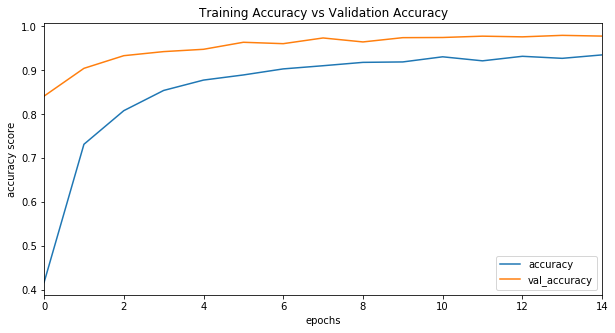

In [39]:
plt.figure(figsize = (10,5))
losses[["accuracy","val_accuracy"]].plot(figsize = (10,5) , title = "Training Accuracy vs Validation Accuracy" ,
                                         legend = "best" )

plt.xlabel("epochs")
plt.ylabel("accuracy score")


# run to save the plot as image
# plt.savefig("Training Accuracy.jpg")
# plt.close()



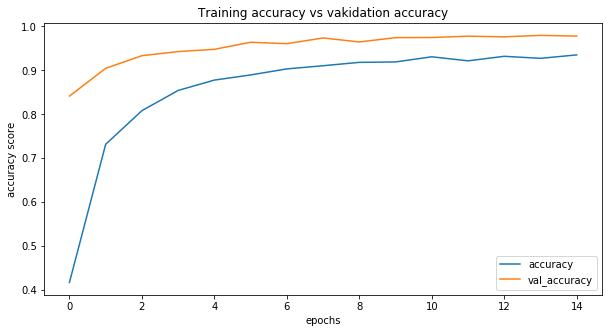

In [41]:
plt.figure(figsize = (10,5))
plt.plot(losses[["accuracy"]] , label = "accuracy")
plt.plot(losses[["val_accuracy"]] , label = "val_accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy score")
plt.title("Training accuracy vs vakidation accuracy")
plt.legend(loc = "best")

# save the figure as an image 
# plt.savefig("training accuracy.png")
# plt.close()                       # you have to close the plt show moode or something near to this check the link below 

# ( https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib )

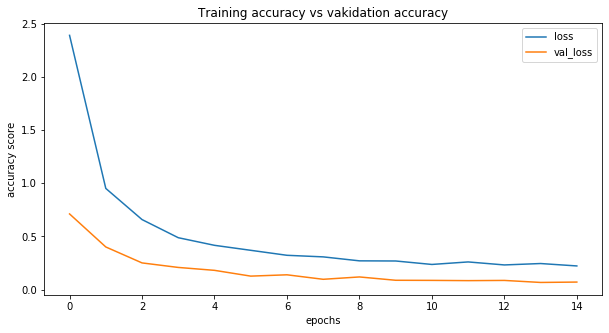

In [43]:
plt.figure(figsize = (10,5))
plt.plot(losses[["loss"]] , label = "loss")
plt.plot(losses[["val_loss"]] , label = "val_loss")

plt.xlabel("epochs")
plt.ylabel("accuracy score")
plt.title("Training accuracy vs vakidation accuracy")
plt.legend(loc = "best")

# plt.savefig("training losses.png")
# plt.close()

In [44]:
import pandas as pd
test = pd.read_csv("C:\\Users\\eslam\\0-MY WORK\\Datasets\\2-German traffic benchmark\\Test.csv")
labels = test["ClassId"].values
images = test["Path"].values




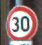

In [45]:
Image.open("C:\\Users\\eslam\\0-MY WORK\\Datasets\\2-German traffic benchmark\\Test\\00001.png")

In [46]:
data = []

for img in images:
    image = Image.open(data_path+ str(img))
    image = image.resize((30,30))
    data.append(np.array(image))
    

In [47]:
# convert to array
X_test = np.array(data)

In [48]:
X_test = X_test.astype("float32")

In [49]:
pred = model.predict_classes(X_test)

## Evaluating the model 

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
print("The Accuracy Score of our Classifier is [{}]".format(accuracy_score(labels , pred)))

The Accuracy Score of our Classifier is [0.9484560570071259]


In [52]:
# classification report
matrix = confusion_matrix(labels , pred)
matrix

array([[ 59,   0,   0, ...,   0,   0,   0],
       [  1, 688,  14, ...,   0,   0,   0],
       [  0,   3, 737, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  88,   0,   0],
       [  0,   0,   0, ...,   0,  40,   0],
       [  0,   0,   0, ...,   0,   0,  83]], dtype=int64)

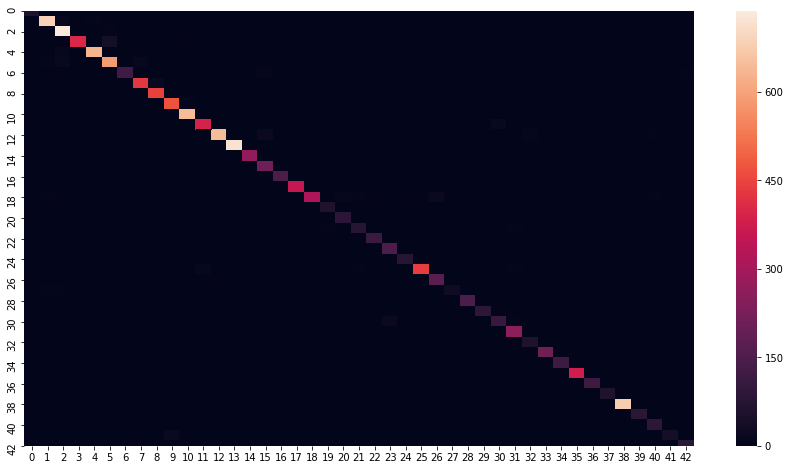

In [53]:
plt.figure(figsize = (15, 8))
sns.heatmap(matrix)

In [ ]:
print(classification_report(labels , pred))

In [54]:
# transform yosur classification report into a file

report = classification_report(labels , pred, output_dict= True)
report_df = pd.DataFrame(report).transpose()

report_df

,precision,recall,f1-score,support
0,0.983333,0.983333,0.983333,60.000000
1,0.950276,0.955556,0.952909,720.000000
2,0.921250,0.982667,0.950968,750.000000
3,0.980344,0.886667,0.931155,450.000000
4,0.976780,0.956061,0.966309,660.000000
5,0.901991,0.934921,0.918161,630.000000
6,0.983871,0.813333,0.890511,150.000000
7,0.940789,0.953333,0.947020,450.000000
8,0.932914,0.988889,0.960086,450.000000
9,0.959267,0.981250,0.970134,480.000000


In [55]:
report_df.to_csv("model_1_tuned report.csv")

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)         

## save model summary 

In [57]:
from contextlib import redirect_stdout

with open('modeltunedsummary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

## Save model

In [58]:
model.save("model1_tuned.h5")